C:\Users\Minseok\AppData\Local\Temp\ipykernel_3656\481276843.py:54: UserWarning: frames=<generator object selection_sort at 0x0000020E1E0B2E40> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)


C:\Users\Minseok\anaconda3\Lib\site-packages\matplotlib\animation.py:1719: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


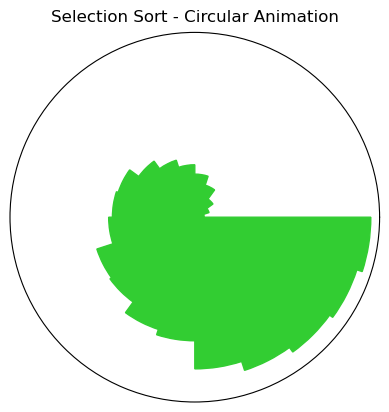

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import random
from IPython.display import HTML



# 무작위 데이터 생성
def generate_data(n=20, max_val=100):
    return [random.randint(1, max_val) for _ in range(n)]

# Selection Sort 애니메이션용 generator
def selection_sort(data):
    n = len(data)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            yield data, min_idx, j, i  # 현재 비교 상태
            if data[j] < data[min_idx]:
                min_idx = j
                yield data, min_idx, j, i  # 최소값 업데이트
        data[i], data[min_idx] = data[min_idx], data[i]  # 스왑
        yield data, min_idx, -1, i  # 스왑 후 상태
    yield data, -1, -1, -1  # 정렬 완료

# 데이터 초기화
data = generate_data()

# 원형 애니메이션 준비
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
angles = np.linspace(0, 2 * np.pi, len(data), endpoint=False)  # 각 데이터의 각도
bars = ax.bar(angles, data, width=2 * np.pi / len(data), align='edge', color='limegreen')
ax.set_yticks([])  # 반지름 축 제거
ax.set_xticks([])  # 각도 축 제거
ax.set_title("Selection Sort - Circular Animation", va='bottom')

# 업데이트 함수
def update(frame):
    current_data, min_idx, j, i = frame
    for idx, (bar, value) in enumerate(zip(bars, current_data)):
        bar.set_height(value)  # 막대 높이 업데이트
        if idx < i:  # 정렬된 부분은 파란색
            bar.set_color("blue")
        elif idx == min_idx:  # 최솟값은 노란색
            bar.set_color("yellow")
        elif idx == j:  # 현재 비교 중인 데이터는 빨간색
            bar.set_color("red")
        else:  # 나머지는 기본 초록색
            bar.set_color("limegreen")

# 애니메이션 실행
generator = selection_sort(data[:])
ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)

# HTML5 비디오로 출력
HTML(ani.to_html5_video())
